# **D209 PA Task 2 - Predictive Analysis | File 2**

In [2]:
import pandas as pd #dataframes
import numpy as np #arrays
import seaborn as sns #visualization
import matplotlib as plt #visualization
from sklearn.feature_selection import SelectKBest, f_classif #Feature selection

In [3]:
df= pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone'], inplace=True)
df.drop(columns=['Email', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], inplace=True)
df.head()

,Population,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Contacts,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,0,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,10446,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,0,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,3735,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,0,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,13863,Solicitor,1,48,18925.23,Married,Male,No,14.913540,2,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,11352,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,2,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436


# **EDA**

In [5]:
df.shape

(10000, 29)

In [6]:
df.dtypes

Population                int64
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
PaymentMethod            object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object

In [7]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,7.000000,6.000000,71.999280,290.160419,7158.981530


In [8]:
df.describe(include=object)

,Job,Marital,Gender,Churn,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
count,10000,10000,10000,10000,10000,10000,10000,10000,7871,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,639,5,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,4
top,Occupational psychologist,Divorced,Female,No,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes,Electronic Check
freq,30,2092,5025,7350,8321,5456,5166,7009,4408,9067,5392,6424,5494,5614,6250,5071,5110,5882,3398


In [9]:
# drop "Job" variable - too many unique observations to encode with dummy variables
df.drop(columns='Job', inplace=True)
df.head()

,Population,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,Widowed,Male,No,7.978323,0,1,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,10446,1,27,21704.77,Married,Female,Yes,11.699080,0,1,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,3735,4,50,9609.57,Widowed,Female,No,10.752800,0,1,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,Married,Male,No,14.913540,2,0,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,Separated,Male,Yes,8.147417,2,1,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436


In [10]:
df.isnull().sum() #missing values

Population                 0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
PaperlessBilling           0
PaymentMethod              0
Tenure                     0
MonthlyCharge              0
Bandwidth_GB_Year          0
dtype: int64

In [11]:
df['InternetService'].value_counts() #2129 missing values from "InternetService" -- will take care of this when getting dummy variables


InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [12]:
df['InternetService'].unique()

array(['Fiber Optic', 'DSL', nan], dtype=object)

# **OUTLIERS**

In [13]:
df.drop(df[df['Income'] > 200000].index, inplace=True)

df.drop(df[df['Population'] > 100000].index, inplace=True)

# **ENCODING CATEGORICAL DATA**

## NOMIAL TYPES

In [14]:
#get dummy variables on "InternetService"
df = pd.get_dummies(df, columns=['InternetService'])
df.head()

,Population,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,...,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_Fiber Optic
0,38,0,68,28561.99,Widowed,Male,No,7.978323,0,1,...,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,False,True
1,10446,1,27,21704.77,Married,Female,Yes,11.699080,0,1,...,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,False,True
2,3735,4,50,9609.57,Widowed,Female,No,10.752800,0,1,...,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,True,False
3,13863,1,48,18925.23,Married,Male,No,14.913540,2,0,...,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,True,False
4,11352,0,83,40074.19,Separated,Male,Yes,8.147417,2,1,...,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,False,True


In [15]:
#remove the space in column title
df.rename(columns={'InternetService_Fiber Optic' : 'InternetService_FiberOptic'}, inplace=True)
df.head()

,Population,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,...,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic
0,38,0,68,28561.99,Widowed,Male,No,7.978323,0,1,...,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,False,True
1,10446,1,27,21704.77,Married,Female,Yes,11.699080,0,1,...,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,False,True
2,3735,4,50,9609.57,Widowed,Female,No,10.752800,0,1,...,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,True,False
3,13863,1,48,18925.23,Married,Male,No,14.913540,2,0,...,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,True,False
4,11352,0,83,40074.19,Separated,Male,Yes,8.147417,2,1,...,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,False,True


In [16]:
df['InternetService_DSL'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['InternetService_FiberOptic'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df[['InternetService_DSL', 'InternetService_FiberOptic']]

,InternetService_DSL,InternetService_FiberOptic
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
9995,1,0
9996,0,1
9997,0,1
9998,0,1


In [17]:
df[['InternetService_DSL', 'InternetService_FiberOptic']].dtypes

InternetService_DSL           int64
InternetService_FiberOptic    int64
dtype: object

In [18]:
df = pd.get_dummies(df, columns=['Marital'])

In [19]:
df.rename(columns={'Marital_Never Married' : 'Marital_NeverMarried'}, inplace=True)

In [20]:
df.drop(columns=['Marital_NeverMarried'], inplace=True)

In [21]:
df['Marital_Divorced'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['Marital_Married'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['Marital_Separated'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['Marital_Widowed'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df.head()

,Population,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,...,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed
0,38,0,68,28561.99,Male,No,7.978323,0,1,No,...,Credit Card (automatic),6.795513,172.455519,904.536110,0,1,0,0,0,1
1,10446,1,27,21704.77,Female,Yes,11.699080,0,1,Yes,...,Bank Transfer(automatic),1.156681,242.632554,800.982766,0,1,0,1,0,0
2,3735,4,50,9609.57,Female,No,10.752800,0,1,Yes,...,Credit Card (automatic),15.754144,159.947583,2054.706961,1,0,0,0,0,1
3,13863,1,48,18925.23,Male,No,14.913540,2,0,Yes,...,Mailed Check,17.087227,119.956840,2164.579412,1,0,0,1,0,0
4,11352,0,83,40074.19,Male,Yes,8.147417,2,1,No,...,Mailed Check,1.670972,149.948316,271.493436,0,1,0,0,1,0


In [22]:
df[['Marital_Divorced', 'Marital_Married', 'Marital_Separated', 'Marital_Widowed']].dtypes

Marital_Divorced     int64
Marital_Married      int64
Marital_Separated    int64
Marital_Widowed      int64
dtype: object

In [23]:
df = pd.get_dummies(df, columns=['Gender'])

In [24]:
df.drop(columns=['Gender_Nonbinary'], inplace=True)

In [25]:
df['Gender_Female'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['Gender_Male'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Contract,...,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male
0,38,0,68,28561.99,No,7.978323,0,1,No,One year,...,172.455519,904.536110,0,1,0,0,0,1,0,1
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,Month-to-month,...,242.632554,800.982766,0,1,0,1,0,0,1,0
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Two Year,...,159.947583,2054.706961,1,0,0,0,0,1,1,0
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,Two Year,...,119.956840,2164.579412,1,0,0,1,0,0,0,1
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Month-to-month,...,149.948316,271.493436,0,1,0,0,1,0,0,1


In [26]:
df[['Gender_Female', 'Gender_Male']].dtypes

Gender_Female    int64
Gender_Male      int64
dtype: object

In [27]:
df = pd.get_dummies(df, columns=['Contract'])

In [28]:
df.drop(columns=['Contract_Two Year'], inplace=True)

In [29]:
df.rename(columns={'Contract_One year' : 'Contract_OneYear'}, inplace=True)

In [30]:
df['Contract_Month-to-month'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['Contract_OneYear'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,...,InternetService_DSL,InternetService_FiberOptic,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_OneYear
0,38,0,68,28561.99,No,7.978323,0,1,No,Yes,...,0,1,0,0,0,1,0,1,0,1
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,No,...,0,1,0,1,0,0,1,0,1,0
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Yes,...,1,0,0,0,0,1,1,0,0,0
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,No,...,1,0,0,1,0,0,0,1,0,0
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Yes,...,0,1,0,0,1,0,0,1,1,0


In [31]:
df = pd.get_dummies(df, columns=['PaymentMethod'])

In [32]:
df.drop(columns=['PaymentMethod_Mailed Check'], inplace=True)

In [33]:
df.rename(columns={'PaymentMethod_Bank Transfer(automatic)' : 'PaymentMethod_BankTransfer(automatic)'}, inplace=True)

df.rename(columns={'PaymentMethod_Credit Card (automatic)' : 'PaymentMethod_CreditCard(automatic)'}, inplace=True)

df.rename(columns={'PaymentMethod_Electronic Check' : 'PaymentMethod_ElectronicCheck'}, inplace=True)

In [34]:
df['PaymentMethod_BankTransfer(automatic)'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['PaymentMethod_CreditCard(automatic)'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df['PaymentMethod_ElectronicCheck'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,...,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_OneYear,PaymentMethod_BankTransfer(automatic),PaymentMethod_CreditCard(automatic),PaymentMethod_ElectronicCheck
0,38,0,68,28561.99,No,7.978323,0,1,No,Yes,...,0,0,1,0,1,0,1,0,1,0
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,No,...,1,0,0,1,0,1,0,1,0,0
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Yes,...,0,0,1,1,0,0,0,0,1,0
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,No,...,1,0,0,0,1,0,0,0,0,0
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Yes,...,0,1,0,0,1,1,0,0,0,0


## ORDINAL ENCODING

In [35]:
df.dtypes

Population                                 int64
Children                                   int64
Age                                        int64
Income                                   float64
Churn                                     object
Outage_sec_perweek                       float64
Contacts                                   int64
Yearly_equip_failure                       int64
Techie                                    object
Port_modem                                object
Tablet                                    object
Phone                                     object
Multiple                                  object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                          object
Tenure              

In [36]:
df['Churn'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Techie'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Port_modem'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Tablet'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Phone'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Multiple'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['OnlineSecurity'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['OnlineBackup'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['DeviceProtection'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['TechSupport'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['StreamingTV'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['StreamingMovies'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['PaperlessBilling'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Churn'].replace({'No' : 0, 'Yes' : 1}, inplace=True)

df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,...,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_OneYear,PaymentMethod_BankTransfer(automatic),PaymentMethod_CreditCard(automatic),PaymentMethod_ElectronicCheck
0,38,0,68,28561.99,0,7.978323,0,1,0,1,...,0,0,1,0,1,0,1,0,1,0
1,10446,1,27,21704.77,1,11.699080,0,1,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3735,4,50,9609.57,0,10.752800,0,1,1,1,...,0,0,1,1,0,0,0,0,1,0
3,13863,1,48,18925.23,0,14.913540,2,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,11352,0,83,40074.19,1,8.147417,2,1,0,1,...,0,1,0,0,1,1,0,0,0,0


In [37]:
df.dtypes

Population                                 int64
Children                                   int64
Age                                        int64
Income                                   float64
Churn                                      int64
Outage_sec_perweek                       float64
Contacts                                   int64
Yearly_equip_failure                       int64
Techie                                     int64
Port_modem                                 int64
Tablet                                     int64
Phone                                      int64
Multiple                                   int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
Tenure              

# **FEATURE SELECTION**

In [38]:
# Assign values to X for all predictor features
# Assign values to y for the dependent variable

X = df.drop(["Tenure"], axis=1)
y = df['Tenure']
print(X.shape)
print(y.shape)

(9992, 35)
(9992,)


In [39]:
feature_names = X.columns

# Initialize the class and call fit_transform

# from sklearn.feature_selection import SelectKBest (already imported)

skbest = SelectKBest(score_func = f_classif, k='all')  
X_new = skbest.fit_transform(X, y)
X_new.shape	

C:\Users\kaili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


(9992, 35)

In [40]:
# Finding P-values to select statistically significant features 

p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value'] < .05]

features_to_keep = p_values['Feature'][p_values['p_value'] < .05]

# Print the name of the selected features

features_to_keep

27        Marital_Widowed
4                   Churn
22    InternetService_DSL
9              Port_modem
21      Bandwidth_GB_Year
0              Population
Name: Feature, dtype: object

In [41]:
df_2 = df[features_to_keep]
df_2.head()

,Marital_Widowed,Churn,InternetService_DSL,Port_modem,Bandwidth_GB_Year,Population
0,1,0,0,1,904.536110,38
1,0,1,0,0,800.982766,10446
2,1,0,1,1,2054.706961,3735
3,0,0,1,0,2164.579412,13863
4,0,1,0,1,271.493436,11352


In [42]:
df[['Tenure']].head()

,Tenure
0,6.795513
1,1.156681
2,15.754144
3,17.087227
4,1.670972


In [43]:
Tenure = df[['Tenure']]

In [44]:
df_3 = pd.concat([df[features_to_keep], Tenure], axis=1)
df_3.head()

,Marital_Widowed,Churn,InternetService_DSL,Port_modem,Bandwidth_GB_Year,Population,Tenure
0,1,0,0,1,904.536110,38,6.795513
1,0,1,0,0,800.982766,10446,1.156681
2,1,0,1,1,2054.706961,3735,15.754144
3,0,0,1,0,2164.579412,13863,17.087227
4,0,1,0,1,271.493436,11352,1.670972


In [45]:
df_3.shape

(9992, 7)

## use df_3 for RF regression

# **MULTICOLLINEARITY**

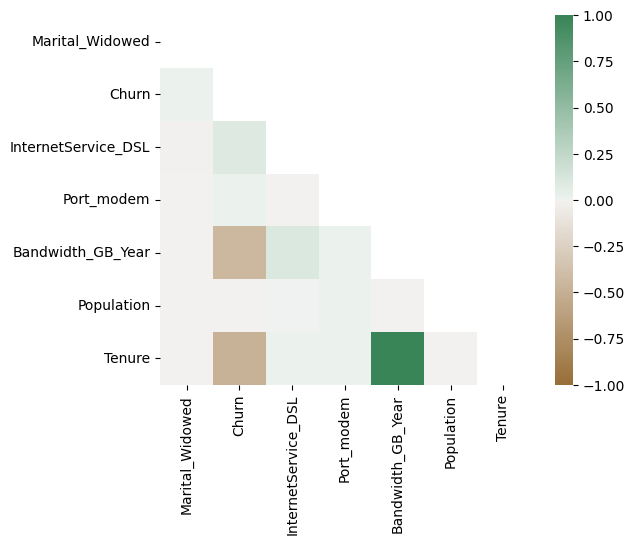

In [46]:
df_corr = df_3.corr()


mask = np.triu(np.ones_like(df_3.corr(), dtype=bool))


axis_corr = sns.heatmap(
    df_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 500, n=500),
    mask=mask, 
    square=True
)

In [47]:
# export cleaned and prepared dataset
df_3.to_csv('prepared_clean_data_RF_prediction.csv', index=False)

# **RANDOM FOREST**

### LIBRARIES and PACKAGES

In [48]:
from sklearn.preprocessing import scale      #scale data values
from sklearn.preprocessing import StandardScaler     #scale data values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split     #split data into training set and testing set
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


### TRAIN TEST SPLIT

In [49]:
X = df_3.drop(['Tenure'], axis=1)
y = df_3['Tenure']

In [50]:
print(X.shape)
print(y.shape)

(9992, 6)
(9992,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7993, 6)
(1999, 6)
(7993,)
(1999,)


In [52]:
# export training and testing datasets
# concatenate training x and y and testing x and y

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv('training_dataset_RF_prediction.csv', index=False)
test_df.to_csv('testing_dataset_RF_prediction.csv', index=False)

### FIT MODEL

In [53]:
# identify optimal values for parameters using hyperparameter tuning
parameters = {"n_estimators": [10, 50, 100],
              "max_features": [2, 3, 4],
              "max_depth": [8, None]
             }

#instantiate Random Forest Regressor object
rf = RandomForestRegressor(random_state=15)

# GridSearchCV
rfcv = GridSearchCV(estimator=rf, 
                           param_grid=parameters, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1)

# Fit the model on training datasets
rfcv.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", rfcv.best_params_)

# Get the best model from the grid search
best_rf_model = rfcv.best_estimator_

# Print best score for top performing model
print("Training Score (MSE): ", -rfcv.best_score_)
#print("Training Score (RMSE): ", (rfcv.best_score_)**(1/2))

# Predict on training set
y_train_pred = rfcv.predict(X_train)
print("Training R^2 score: ", r2_score(y_train, y_train_pred))

Best Hyperparameters: {'max_depth': 8, 'max_features': 4, 'n_estimators': 100}
Training Score (MSE):  4.521303331809527
Training R^2 score:  0.9947215259532267


### PREDICT ON TEST SET

In [54]:
# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model performance
mse = MSE(y_test, y_pred)
print("MSE on Test Set:", mse)
print("R^2 on Test Set: ", r2_score(y_test, y_pred))

MSE on Test Set: 4.460088184498988
R^2 on Test Set:  0.9934593513916969


### FEATURE IMPORTANCE

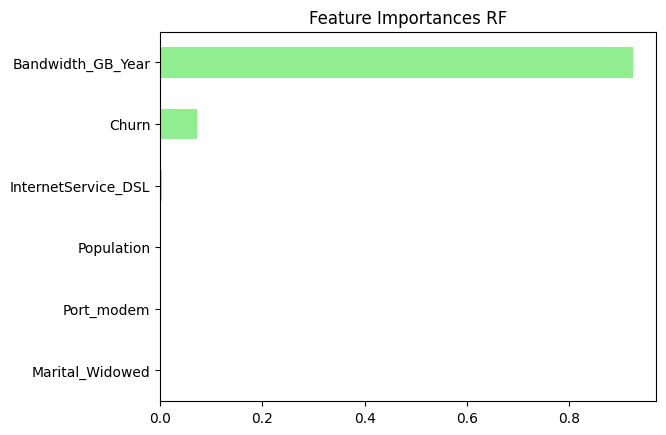

In [55]:
from matplotlib.pyplot import plot, show, title

# create a pd.Series of feature importances
importances_rf = pd.Series(data=rfcv.best_estimator_.feature_importances_,
                           index=X_train.columns)

# sort importances
sorted_importances_rf = importances_rf.sort_values()

# plot horizontal barchart of sorted_importances
sorted_importances_rf.plot(kind='barh', color='lightgreen')
title("Feature Importances RF")
show()

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Tenure'>

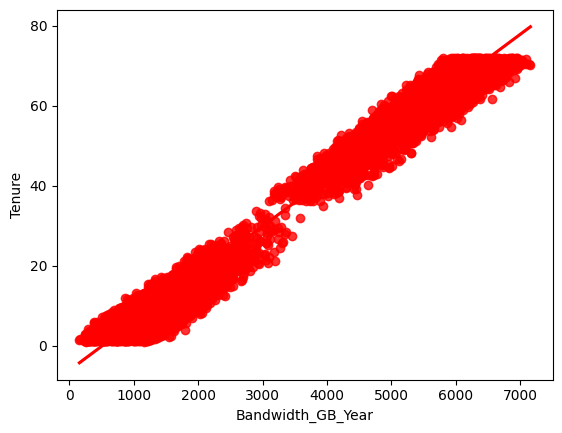

In [56]:
sns.regplot(x='Bandwidth_GB_Year', y='Tenure', data=df_3, color='red', ci=None)